In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Final_Assignment_Face Mask Dataset/Train'
valid_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Final_Assignment_Face Mask Dataset/Validation'
test_dir = '/Users/kavleenkaur/Downloads/kavi/internshala deep learning/Final_Assignment_Face Mask Dataset/Test'


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model1.add(keras.layers.MaxPooling2D((2,2)))

model1.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))

model1.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))

model1.add(keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(keras.layers.MaxPooling2D((2,2)))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(512,activation = 'relu'))
model1.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [11]:
from tensorflow.keras import optimizers
model1.compile(loss = 'binary_crossentropy', optimizer  = tf.keras.optimizers.legacy.RMSprop(learning_rate = 1e-4),metrics = ['acc'])

In [12]:
model_history = model1.fit(train_generator,steps_per_epoch = 500, epochs = 5, validation_data = valid_generator, validation_steps = 40)

Epoch 1/5
500/500 [==============================] - 50s 100ms/step - loss: 0.1507 - acc: 0.9416 - val_loss: 0.0374 - val_acc: 0.9850
Epoch 2/5
500/500 [==============================] - 52s 104ms/step - loss: 0.0477 - acc: 0.9824 - val_loss: 0.0229 - val_acc: 0.9925
Epoch 3/5
500/500 [==============================] - 54s 107ms/step - loss: 0.0337 - acc: 0.9886 - val_loss: 0.0163 - val_acc: 0.9925
Epoch 4/5
500/500 [==============================] - 53s 106ms/step - loss: 0.0258 - acc: 0.9913 - val_loss: 0.0455 - val_acc: 0.9825
Epoch 5/5
500/500 [==============================] - 55s 110ms/step - loss: 0.0204 - acc: 0.9924 - val_loss: 0.0204 - val_acc: 0.9900


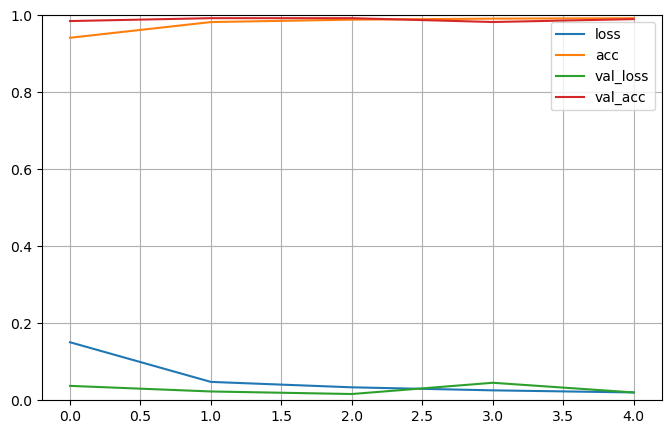

In [13]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model1.evaluate(test_generator, steps=49)

49/49 [==============================] - 1s 28ms/step - loss: 0.0418 - acc: 0.9837


[0.04179179668426514, 0.9836734533309937]

In [16]:
model1.save("CNN_final.h5")

/Users/kavleenkaur/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras import backend as K
K.clear_session()
del model1

# VGG19

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [19]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

80134624/80134624 [==============================] - 6s 0us/step


In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
conv_base.trainable = False

In [26]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

In [33]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=500,
      epochs=1,
      validation_data=valid_generator,
      validation_steps=40)

/var/folders/kk/xmhwr_2d78l5dsqlkws2vy880000gn/T/ipykernel_5085/3863069637.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


500/500 [==============================] - 554s 1s/step - loss: 0.0182 - acc: 0.9938 - val_loss: 0.0030 - val_acc: 0.9987


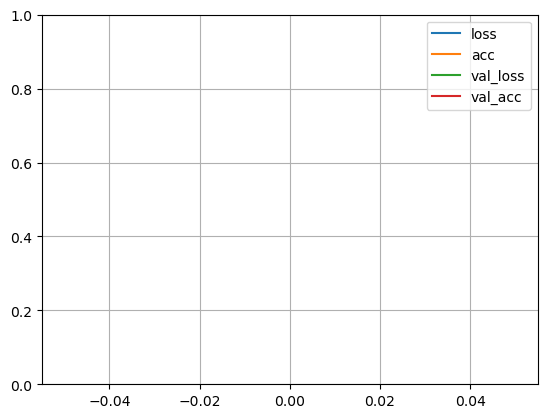

In [31]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model.evaluate(test_generator, steps=49)

49/49 [==============================] - 38s 769ms/step - loss: 0.0138 - acc: 0.9939


[0.01380808837711811, 0.9938775300979614]

In [ ]:
model.save("CNN_final.h5")